In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#open the file and read in the information
file_path = 'Otto_Engine_abbreviated.dat'
 
with open(file_path, 'r') as file:
    content = file.read()
    print(content)

Process			P (atm) V (m^3)		T (K)		mass (kg)	
Compression 	1.0000	5.625E-04	330.3602	6.131E-04	
Compression 	1.0762	5.434E-04	337.0066	6.131E-04	
Compression 	1.1309	5.243E-04	341.6853	6.131E-04	
Compression 	1.1902	5.052E-04	346.5259	6.131E-04	
Compression 	1.2549	4.861E-04	351.5451	6.131E-04	
Compression 	1.3256	4.670E-04	356.7618	6.131E-04	
Compression 	1.4032	4.479E-04	362.1975	6.131E-04	
Compression 	1.4887	4.288E-04	367.8770	6.131E-04	
Compression 	1.5833	4.097E-04	373.8290	6.131E-04	
Compression 	1.6885	3.906E-04	380.0868	6.131E-04	
Compression 	1.8062	3.715E-04	386.6892	6.131E-04	
Compression 	1.9385	3.524E-04	393.6822	6.131E-04	
Compression 	2.0883	3.333E-04	401.1205	6.131E-04	
Compression 	2.2592	3.142E-04	409.0698	6.131E-04	
Compression 	2.4556	2.951E-04	417.6098	6.131E-04	
Compression 	2.6836	2.760E-04	426.8384	6.131E-04	
Compression 	2.9509	2.569E-04	436.8776	6.131E-04	
Compression 	3.2682	2.378E-04	447.8812	6.131E-04	
Compression 	3.6502	2.187E-04	460.0474	6.131E-04	
Compr

In [3]:
#split up the columns of the file
file = open('Otto_Engine_abbreviated.dat')
lst = []
for line in file:
    lst += [line.split()]

#get each column into an array for the process, pressure, volume, temperature, and mass
column0 = np.array([x[0] for x in lst])
process = np.array(column0[1:])
#0-26 = compression, 26-52 = combustion, 53-88 = expansion, 88-90 = blowdown, 90-116 = intake, 116-142 = exhaust 
#found these indicies by printing the data by process 
column1 = np.array([x[1] for x in lst])
pressure_string = np.array(column1[1:])
pressure = [float(num_str) for num_str in pressure_string]
column2 = np.array([x[2] for x in lst])
volume_string = np.array(column2[1:])
volume = [float(num_str) for num_str in volume_string]
column3 = np.array([x[3] for x in lst])
temperature_string = np.array(column3[1:])
temperature = [float(num_str) for num_str in temperature_string]
column4 = np.array([x[4] for x in lst])
mass_string = np.array(column4[1:])
mass = [float(num_str) for num_str in mass_string]


In [4]:
#since we're given mass, we need to solve for the number of particles to use in part B
def num_of_part(m):
    num = ((780*m/28) + ((220*m)/32)) * (6.022*10**23)
    return num

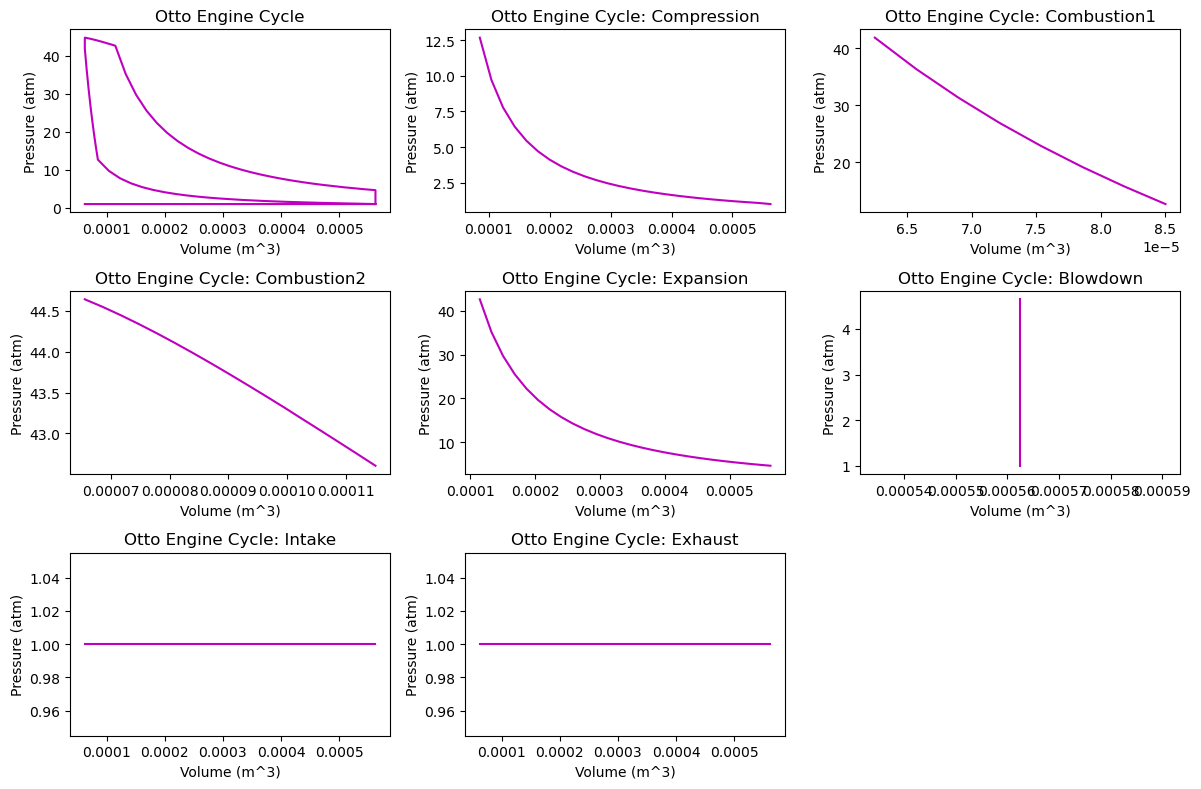

In [5]:
plt.figure(figsize=(12, 8))

#plots the full graph
plt.subplot(3, 3, 1)
plt.plot(volume, pressure, c='m')
plt.xlabel('Volume (m^3)')
plt.ylabel('Pressure (atm)')
plt.title('Otto Engine Cycle')

#plots the compression period of the cycle
plt.subplot(3, 3, 2)
plt.plot(volume[0:26], pressure[0:26], c='m')
plt.xlabel('Volume (m^3)')
plt.ylabel('Pressure (atm)')
plt.title('Otto Engine Cycle: Compression')

#plots the first combustion (decreasing volume) of the period
plt.subplot(3, 3, 3)
plt.plot(volume[26:34], pressure[26:34], c='m')
plt.xlabel('Volume (m^3)')
plt.ylabel('Pressure (atm)')
plt.title('Otto Engine Cycle: Combustion1')

#plots the second (increasing volume) of the period 
plt.subplot(3, 3, 4)
plt.plot(volume[35:52], pressure[35:52], c='m')
plt.xlabel('Volume (m^3)')
plt.ylabel('Pressure (atm)')
plt.title('Otto Engine Cycle: Combustion2')

#plots the expansion portion of the cycle
plt.subplot(3, 3, 5)
plt.plot(volume[52:88], pressure[52:88], c='m')
plt.xlabel('Volume (m^3)')
plt.ylabel('Pressure (atm)')
plt.title('Otto Engine Cycle: Expansion')

#plots the blowdown section of the cycle
plt.subplot(3, 3, 6)
plt.plot(volume[88:90], pressure[88:90], c='m')
plt.xlabel('Volume (m^3)')
plt.ylabel('Pressure (atm)')
plt.title('Otto Engine Cycle: Blowdown')

#plots the intake portion of the cycle
plt.subplot(3, 3, 4+3)
plt.plot(volume[90:116], pressure[90:116], c='m')
plt.xlabel('Volume (m^3)')
plt.ylabel('Pressure (atm)')
plt.title('Otto Engine Cycle: Intake')

#plots the exhaust portion of the cycle 
plt.subplot(3, 3, 5+3)
plt.plot(volume[116:142], pressure[116:142], c='m')
plt.xlabel('Volume (m^3)')
plt.ylabel('Pressure (atm)')
plt.title('Otto Engine Cycle: Exhaust')

plt.tight_layout()
plt.show()

In [19]:
#finding the area under the curve to get the work
area_compression = np.trapz(pressure[0:26], volume[0:26])
work_compression = -area_compression*101325
print("The work for the compression cycle is:", np.round(work_compression, decimals=1), "J")

area_combustion1 = np.trapz(pressure[26:34], volume[26:34])
work_combustion1 = -area_combustion1*101325
print("The work for the first part of the combustion cycle is:", np.round(work_combustion1, decimals=1), "J")

area_combustion2 = np.trapz(pressure[35:52], volume[35:52])
work_combustion2 = -area_combustion2*101325
print("The work for the second part of the combustion cycle is:", np.round(work_combustion2, decimals=1), "J")

area_expansion = np.trapz(pressure[52:88], volume[52:88])
work_expansion = -area_expansion*101325
print("The work for the expansion cycle is:", np.round(work_expansion, decimals=1), "J")

area_intake = np.trapz(pressure[90:116], volume[90:116])
work_intake = -area_intake * 101325
print("The work for the intake period is:", np.round(work_intake, decimals=1), "J")

area_exhaust = np.trapz(pressure[116:142], volume[116:142])
work_exhaust = -area_exhaust * 101325
print("The work for the exhaust period is:", np.round(work_exhaust, decimals=1), "J")

net_work = work_compression + work_combustion1 + work_combustion2 + work_expansion + work_intake + work_exhaust
print("The net work is:", np.round(net_work, decimals=0), "J")



The work for the compression cycle is: 155.3 J
The work for the first part of the combustion cycle is: 58.5 J
The work for the second part of the combustion cycle is: -218.7 J
The work for the expansion cycle is: -600.0 J
The work for the intake period is: -50.7 J
The work for the exhaust period is: 50.7 J
The net work is: -605.0 J


- heat during the isentropic sections = 0 J
    - not adiabatic because temperature is not constant 

In [20]:
#finding the change in kinetic energy to use the first law of thermodynamics 
def kinetic_energy(N, T):
    k = 1.38 * 10 ** (-23) #J/K
    KE = 5/2 * N * k * T
    return KE

#finding the change in kinetic energy at each phase of the cycle depending on the mass and temperature 
KE_compression_initial = kinetic_energy(num_of_part(mass[0]), temperature[0])
KE_compression_final = kinetic_energy(num_of_part(mass[26]), temperature[26])
deltaKE_compression = KE_compression_final - KE_compression_initial
print("The change in kinetic energy during the compression period is:", np.round(deltaKE_compression, 
                                                                                 decimals=1), "J")

KE_combustion1_initial = kinetic_energy(num_of_part(mass[26]), temperature[26])
KE_combustion1_final = kinetic_energy(num_of_part(mass[33]), temperature[33])
deltaKE_combustion1 = KE_combustion1_final - KE_combustion1_initial
print("The change in kinetic energy during the first combustion period is:", np.round(deltaKE_combustion1, 
                                                                                      decimals=1), "J")

KE_combustion_vertical_initial = kinetic_energy(num_of_part(mass[33]), temperature[33])
KE_combustion_vertical_final = kinetic_energy(num_of_part(mass[34]), temperature[34])
deltaKE_combustion_vertical = KE_combustion_vertical_final - KE_combustion_vertical_initial
print("The change in kinetic energy during the vertical portion of the combustion period is:", 
      np.round(deltaKE_combustion_vertical, decimals=1), "J")

KE_combustion2_initial = kinetic_energy(num_of_part(mass[34]), temperature[34])
KE_combustion2_final = kinetic_energy(num_of_part(mass[52]), temperature[52])
deltaKE_combustion2 = KE_combustion2_final - KE_combustion2_initial
print("The change in kinetic energy during the second combustion period is:", np.round(deltaKE_combustion2, 
                                                                                       decimals=1), "J")

KE_expansion_initial = kinetic_energy(num_of_part(mass[52]), temperature[52])
KE_expansion_final = kinetic_energy(num_of_part(mass[88]), temperature[88])
deltaKE_expansion = KE_expansion_final - KE_expansion_initial
print("The change in kinetic energy during the expansion period is:", np.round(deltaKE_expansion, 
                                                                               decimals=1), "J")

KE_blowdown_initial = kinetic_energy(num_of_part(mass[88]), temperature[88])
KE_blowdown_final = kinetic_energy(num_of_part(mass[89]), temperature[89])
deltaKE_blowdown = KE_blowdown_final - KE_blowdown_initial
print("The change in kinetic energy during the blowdown period is:", np.round(deltaKE_blowdown, 
                                                                              decimals=1), "J")

KE_intake_initial = kinetic_energy(num_of_part(mass[90]), temperature[90])
KE_intake_final = kinetic_energy(num_of_part(mass[116]), temperature[116])
deltaKE_intake = KE_intake_final - KE_intake_initial
print("The change in kinetic energy during the intake period is:", np.round(deltaKE_intake, 
                                                                            decimals=1), "J")

KE_exhaust_initial = kinetic_energy(num_of_part(mass[116]), temperature[116])
KE_exhaust_final = kinetic_energy(num_of_part(mass[141]), temperature[141])
deltaKE_exhaust = KE_exhaust_final - KE_exhaust_initial
print("The change in kinetic energy during the exhaust period is:", np.round(deltaKE_exhaust, 
                                                                             decimals=1), "J")

total_KE = deltaKE_compression + deltaKE_combustion1 + deltaKE_combustion_vertical + deltaKE_combustion2 + deltaKE_expansion + deltaKE_blowdown + deltaKE_intake + deltaKE_exhaust
print("The total change in kinetic energy is:", np.round(total_KE, decimals=1), "J")



The change in kinetic energy during the compression period is: 128.4 J
The change in kinetic energy during the first combustion period is: 391.8 J
The change in kinetic energy during the vertical portion of the combustion period is: 46.4 J
The change in kinetic energy during the second combustion period is: 536.5 J
The change in kinetic energy during the expansion period is: -582.2 J
The change in kinetic energy during the blowdown period is: -523.5 J
The change in kinetic energy during the intake period is: 127.5 J
The change in kinetic energy during the exhaust period is: -127.5 J
The total change in kinetic energy is: -2.7 J


In [21]:
#using the first law of thermodynamics to find the heat 
#not taking into account any other energy forms 
def heat(deltaKE, W):
    Q = deltaKE - W
    return Q 

#finding the heat for each phase of the cycle
heat_compression = heat(deltaKE_compression, work_compression)
print("The heat for the compression period is:", np.round(heat_compression, decimals=1), "J")

heat_combustion1 = heat(deltaKE_combustion1, work_combustion1)
print("The heat for the first combustion period is:", np.round(heat_combustion1, decimals=1), "J")

heat_combustion2 = heat(deltaKE_combustion2, work_combustion2)
print("The heat for the second combustion period is:", np.round(heat_combustion2, decimals=1), "J")

heat_combustion_vertical = heat(deltaKE_combustion_vertical, 0)
print("The heat for the vertical portion of the combustion period is:", 
      np.round(heat_combustion_vertical, decimals=1), "J")

heat_expansion = heat(deltaKE_expansion, work_expansion)
print("The heat for the expansion period is:", np.round(heat_expansion, decimals=1), "J")

heat_blowdown = heat(deltaKE_blowdown, 0)
print("The heat for the blowdown period is:", np.round(heat_blowdown, decimals=1), "J")

heat_intake = heat(deltaKE_intake, work_intake)
print("The heat for the intake period is:", np.round(heat_intake, decimals=1), "J")

heat_exhaust = heat(deltaKE_exhaust, work_exhaust)
print("The heat for the exhaust period is:", np.round(heat_exhaust, decimals=1), "J")

The heat for the compression period is: -26.9 J
The heat for the first combustion period is: 333.3 J
The heat for the second combustion period is: 755.2 J
The heat for the vertical portion of the combustion period is: 46.4 J
The heat for the expansion period is: 17.9 J
The heat for the blowdown period is: -523.5 J
The heat for the intake period is: 178.2 J
The heat for the exhaust period is: -178.2 J


In [22]:
total_heat = heat_compression + heat_combustion1 + heat_combustion2 + heat_combustion_vertical + heat_expansion + heat_blowdown + heat_intake + heat_exhaust
print("The total heat flow through the cycle is:", np.round(total_heat, decimals=1), "J")

The total heat flow through the cycle is: 602.3 J


In [24]:
#efficiency is defined as the net work divided by the heat put in
#knowing this, my denominator consists of the positive heat values I found from the previous part, 
#symbolizing heat being added
def efficiency(W, Q1, Q2, Q3, Q4, Q5):
    eff = (W / (Q1 + Q2 + Q3 + Q4 + Q5)) * 100
    return eff

efficiency1 = np.absolute(efficiency(net_work, heat_combustion1, heat_combustion2, heat_combustion_vertical, heat_expansion, heat_intake))
print("The efficiency of the system is:", np.round(efficiency1, decimals=0), '%')

The efficiency of the system is: 45.0 %


- we know that the number of particles is changing, but to find the chemical potential, we need to find the gibbs free energy